In [1]:
from sail.core import VMSetup, registersafeobj,login,connect,pushsafeobj,querydata,get_fns
from sail.data import RemoteDataFrame, Utils, RemoteSeries
from sail.algo import fdxgb

from sail.tmp import shap_private, get_tmp_fns

In [2]:
import time

In [3]:
import json, requests
soPath = "/Engineering/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
backendIP = "20.185.6.111"

registersafeobj(soPath)
print("[P]safe objects registered")

[P]safe objects registered


In [4]:
from sail.core import login
eosb = login("adam.hall@secureailabs.com", "-OJBFE2qw-OJBFE2qw", 6200, backendIP)
print("[P]login success")
print(eosb)

[P]login success
5iEQAhtloSPu27f8mB2J9/hYNm80O9/6y5Pk8aMJoG7AnHcg9oG0mBRzQEW2DIUH2AibcyYDAAAwCXzM7KNTclvHmRGyFB49cieHtwE8HPFTU4RV8NfYRhiFmhi//JfX3TtmGx0rz2PQaH5VH3ebpAbkGIwKEkH4tjVgHPEbkri2tq7HJOYr5F81z9XlD9fBoVgGRkW4A4gi0ylH682Jc0mwjX6lVbtTXBHO55bwYjs9pzJkopki0uiCowHa/nUAk9kIiLm3okEgTff0KSUVouxjJJmyEINa+MGn+SLB5URRcKYwmb+TDVhmvekkthzj7BOlkePF7Xk3kERY5tjLT8D48+C8f4Wg5VjggL+n9SnXPC5VkDlgb0SSBZcxQqAWxUFh3D8/uKtUc/nKUqM1hQFvxzjJ1YhRMXbbBJ0+km4kd0nhlZQ9OKQzrUELTteAnAr+xjN+02jWSLuWRkQaV8j76ChHUXORb0wDLtvtLBHyfwuDHcuA473i401p91iz0c8wCwtHx6JCGEkJ2l7djY4w/4cFWOV03ydgjK3EriKogtg4lIgKiQuoUXH85GjQKCKZP/KvDusLWlKTsvvMpH2/W7UI96+Ur+qPRnlr6ik5CK7g0H52s4Iq9DEKFjw6Ncqd8BrwxE29Z6ud1XQ58wp2A7PSBQ3uOaKZnDIBMKaj3khJNTPN72wjzQbWgnp9isV2LMD+VAU9IaBdeimusv1Op8bnBj+IboDrHbIHWKSW2cSfGrzEElZ2Hkk9C1jFHMIcHMHWGg3Z46al9GAlcX+ZzwUmKXDdT7OKdD4Or+/yd4j+8KO4N5BvznaVJ6CkX9GywkQaKlXdCJaAB4GdLQyS+0Ne9lTuPdSs0FxW20AVG91CF+41oc2HoyEBDchq3Aq66PKjRLjbmFlQhEfZGRm89jt1QAlGeapc41m9M08CJfhb1CAwDIxnSHG7r5kFZGTRwhPYdt75eKqBADDaoM0

In [5]:
#setup the communication with the remote virtual machines with digital contracts
dc =  [{"DigitalContractGuid":"{34E8FF34-2D5E-41C1-ACF4-0106227D88A5}"}]
backendIP = "20.185.6.111"
url = "https://"+backendIP+":6200/SAIL/VirtualMachineManager/GetRunningVMsIpAdresses?Eosb="+eosb

In [6]:
#obtain virtual machines ids and dataset ids, so we can confirm the datasets are intact and ready for studying
import json, requests
payloads = []
for item in dc:
    temp = json.dumps(item)
    payloads.append(temp)

headers = {
    'Content-Type': 'application/json'
}

ips = []
for payload in payloads:
    print(payload)
    response = requests.request("GET", url, headers=headers, data=payload, verify=False)
    print(response)
    response = response.json()
    print(response)
    for key in response['VirtualMachines']:
        ips.append(response['VirtualMachines'][key])
        print(ips)

{"DigitalContractGuid": "{34E8FF34-2D5E-41C1-ACF4-0106227D88A5}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '20.185.6.111'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
{'Status': 200.0, 'VirtualMachines': {'D4FBEF729FB34463BBC6616218C8AD92': '20.107.21.19'}}
['20.107.21.19']


In [7]:
from sail.core import connect

vmids = []
for ip in ips:
    vmid = connect(ip, 3500)
    vmids.append(vmid)
    print("[P]virtual machine connection to ip: {0} success".format(ip))
vmids

[P]virtual machine connection to ip: 20.107.21.19 success


['{A2817257-5207-4A42-A713-742727362C76}']

In [8]:
from sail.core import get_fns, pushsafeobj

fns = get_fns()
for vm in vmids:
    for key in fns:
        pushsafeobj(vm, fns[key])
print("[P]safe object pushed to virtual machines")
fns

[P]safe object pushed to virtual machines


{'getitem': 'F11C49327A9244A5AEE568B531C6A957',
 'getattr': '9C4019584DB04B1A9BF05EC91836BCB0',
 'setitem': 'A04E4CC9E3BC4A7B9AFAB6CB3E040FAC',
 'iter': 'CC8B5A66C10F47A1A977E2BE2B522768',
 'next': '6D48AC3C3245411992E65E5FF5B90DDB',
 'rdf_describe': '18F2566E7FF34D77A7DE668DD220CEFD',
 'rdf_drop': '9A04D50B403C4716A79CABEF1F90D832',
 'rdf_dropna': '039181877F8A492A86A4BD996D0AD4E2',
 'rdf_merge': '8C938D7D313A49C09509D6A43AAFD096',
 'rdf_groupby': '3E3716FCA7DE4ABEB8A3FAB4DA14EA9D',
 'rdf_query': 'BF18C294BCCC4B9C94624C79D2506CCC',
 'rdf_sort_values': '10DCB6636C8A4832AD6CE7BCDB1F9983',
 'rdf_set_index': '09EE6479EE97461DBC4E44D95D77235B',
 'rdf_reset_index': 'F408E02C932D47C49BC5DC640C108AEB',
 'rdf_label_encode': '56D864CD0B81459CB0540E364BB49D6F',
 'groupby_agg': 'CEFAABE1879741269037050B25A5CCFD',
 'groupby_diff': '9604982079924320B6C7B6DCA27CFC6C',
 'groupby_cumsum': 'AB04C77FA5DD4B1B8AAD2867F44BC886',
 'groupby_first': 'FF2156013B9A483F9FC8F0DB27E3B74D',
 'series_add': 'B13E83BD

In [9]:
from sail.core import querydata

table = []
for vm in vmids:
    tableid = querydata(vm)
    table.append(tableid)
print("[P]obtain table ids")

datasets = table
table

[P]obtain table ids


[{'agreement09nov': 'F6C97A39723D4F478CC06371EB98103B',
  'agreementMapping': '1EE7D5340BEFBB40BB21D92CF002A7C6',
  'contact09nov': '99FC69A3BEABFB4C865F6B0D594A6173',
  'createReasonMapping': '068E2C8F14EC0241968305B80D12F65F',
  'payment09nov': '5CDB0CBA5D6D3D4E81A00524D8602448'}]

In [10]:
string = table[0]['agreement09nov']
string

'F6C97A39723D4F478CC06371EB98103B'

In [11]:
vmids

['{A2817257-5207-4A42-A713-742727362C76}']

In [12]:
start_time = time.time()


data = []
i = 0
for vm in vmids:
    util = Utils(vm, fns)
    data.append([util.read_csv(table[i]['agreement09nov']), util.read_csv(table[i]['contact09nov']), util.read_csv(table[i]['payment09nov']), util.read_csv(table[i]['agreementMapping']), util.read_csv(table[i]['createReasonMapping'])])
    i+=1
    print(i)

print(time.time() - start_time)

1
24.02761459350586


In [13]:
df = RemoteDataFrame(vmids[0], data[0][0], fns)
df.columns

Index(['AgreementGUID', 'AgreementID', 'Startdate', 'CreateReason',
       'Cancelreason', 'CancelDate', 'ChannelName', 'ChannelD',
       'AgreementType', 'FutureCancelDate', 'FutureCancel', 'ContactGUID',
       'ContactID'],
      dtype='object')

In [14]:
model = fdxgb(vmids)

In [15]:
start_time = time.time()

#Preprocess to raw data and obtain the final dataframe 
processed_data = model.data_preprocessv6(data)

print(time.time() - start_time)

168.17867875099182


In [16]:
processed_data

[['{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.22781F1189EE4A59811FC87A58F87FE1',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.A25D92AC2CE3419183BA2D2DC327853E',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.1D45849AE8E348AC9E0E1D327963720B',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.DFF3006247B84C48B8F6566A1FBCF450',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.04791A2940C246C9BFF33BD8CEAC5A4E',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.E0C8C95A43FE48A980DD74EB94B50D52',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.0BF4AC222C15496884B65150893F2BBA',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.E87E761B37B14F8CA829CC9558A3B22E',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.A532E0888F9943A3AE5CDD8EEA16A5C8',
  '{90D09457-4EBF-4AAF-B736-BED1E86DCD22}.178301F3D4C54CFF838BB97729BD0D96']]

In [17]:
#[y_val, y_test, X_val, X_test, X_train, y_train, X_train_val, y_train_val]
X_train = [processed_data[0][0]]
y_train = [processed_data[0][1]]
X_val = [processed_data[0][2]]
y_val = [processed_data[0][3]]
X_train_val = [processed_data[0][4]]
y_train_val = [processed_data[0][5]]
X_test = [processed_data[0][6]]
y_test = [processed_data[0][7]]

In [18]:
X_train_df = RemoteDataFrame(vmids[0], X_train[0], fns)
cols = X_train_df.columns
cols

Index(['Age_max', 'ChargedAmount_sum', 'PostalCode_max', 'PaidAmount_sum',
       'AgreementGUID_count', 'PaymentGUID_count', 'Donation_sum',
       'Medlemskab_sum', 'Product_sum', 'Lottery_sum',
       'payment_on_agreement_sum', 'months_since_start_min',
       'months_since_start_max', 'months_since_last_payment_min',
       'months_since_last_payment_max', 'months_since_missing_payment_min',
       'months_since_missing_payment_max', 'missing_payment_sum',
       'AgreementType_donation_sum', 'AgreementType_event_sum',
       'AgreementType_householdMembership_sum',
       'AgreementType_membershipWithDonation_sum',
       'AgreementType_personalMembership_sum',
       'AgreementType_researchRelated_sum',
       'AgreementType_householdMembershipWithDonation_sum',
       'AgreementType_lottery_sum', 'ChannelD_Betalingsservice_sum',
       'ChannelD_Card_sum', 'ChannelD_Giro_sum', 'ChannelD_Invoice_sum',
       'ChannelD_Mobilepay_sum', 'ChannelD_MobilepaySubscription_sum',
       

In [19]:
y_train_df = RemoteDataFrame(vmids[0], y_train[0], fns)
lab = y_train_df.value_counts()
lab

0    406776
1      6624
Name: is_churned_within3m, dtype: int64

In [20]:
int(lab[0]/lab[1])

61

In [21]:
#Setup parameters for federated xgboost model
from sail.algo import fdxgb
model_params = {
"colsample_bylevel": 0.8523804169779899,
"colsample_bytree": 0.4004491523598215,
"gamma": 1e-09,
"learning_rate": 0.07585296847082715,
"max_delta_step": 20,
"max_depth": 9,
"n_estimators": 150,
"reg_alpha": 6.8398027190415516e-06,
"reg_lambda": 100.0,
"subsample": 0.4,
"scale_pos_weight": int(lab[0]/lab[1])
}

model.params = model_params

In [22]:
model.feature_num = len(cols)

In [23]:
start_time = time.time()

xgbmodel = model.fit(X_train,y_train)

print(time.time() - start_time)

all_hashes has len 71
[04:53:13] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
Tree 51
Tree 52
Tree 53
Tree 54
Tree 55
Tree 56
Tree 57
Tree 58
Tree 59
Tree 60
Tree 61
Tree 62
Tree 63
Tree 64
Tree 65
Tree 66
Tree 67
Tree 68
Tree 69
Tree 70
Tree 71
Tree 72
Tree 73
Tree 74
Tree 75
Tree 76
Tree 77
Tree 78


In [24]:
start_time = time.time()

results =  model.aucpr_score(xgbmodel, X_val, y_val)

print(time.time() - start_time)

8.684702396392822


In [68]:
precision = []
recall = []
for i in range(len(results[0][3])):
    tmp = [0,0,0,0]
    print("Threshold "+str(i))
    print(results[0][3][i])
    
    
    #The confusion matrix is inverted, that's why this is inverted. The negative class is marked as the true class
    #TP
    tmp[0]+=results[0][3][i].ravel()[0]
    #FP
    tmp[1]+=results[0][3][i].ravel()[1]
    #FN
    tmp[2]+=results[0][3][i].ravel()[2]
    #TN
    tmp[3]+=results[0][3][i].ravel()[3]
    
    print(tmp)
    
    if (tmp[3]+tmp[1]) == 0:
        prec = 0
    else:
        prec = tmp[3]/(tmp[3]+tmp[1])
    reca = tmp[3]/(tmp[3]+tmp[2])
    precision.append(prec)
    recall.append(reca)

Threshold 0
[[    0 32139]
 [    0   505]]
[0, 32139, 0, 505]
Threshold 1
[[27582  4557]
 [  333   172]]
[27582, 4557, 333, 172]
Threshold 2
[[29011  3128]
 [  376   129]]
[29011, 3128, 376, 129]
Threshold 3
[[29786  2353]
 [  387   118]]
[29786, 2353, 387, 118]
Threshold 4
[[30253  1886]
 [  394   111]]
[30253, 1886, 394, 111]
Threshold 5
[[30549  1590]
 [  415    90]]
[30549, 1590, 415, 90]
Threshold 6
[[31011  1128]
 [  432    73]]
[31011, 1128, 432, 73]
Threshold 7
[[31410   729]
 [  443    62]]
[31410, 729, 443, 62]
Threshold 8
[[31578   561]
 [  449    56]]
[31578, 561, 449, 56]
Threshold 9
[[31708   431]
 [  466    39]]
[31708, 431, 466, 39]
Threshold 10
[[31738   401]
 [  468    37]]
[31738, 401, 468, 37]
Threshold 11
[[31825   314]
 [  480    25]]
[31825, 314, 480, 25]
Threshold 12
[[31865   274]
 [  485    20]]
[31865, 274, 485, 20]
Threshold 13
[[31907   232]
 [  487    18]]
[31907, 232, 487, 18]
Threshold 14
[[31924   215]
 [  491    14]]
[31924, 215, 491, 14]
Threshold 15


In [69]:
precision

[0.015469917902217866,
 0.03637132586170438,
 0.03960700030703101,
 0.04775394577094294,
 0.05558337506259389,
 0.05357142857142857,
 0.06078268109908409,
 0.07838179519595449,
 0.09076175040518639,
 0.08297872340425531,
 0.08447488584474885,
 0.07374631268436578,
 0.06802721088435375,
 0.072,
 0.0611353711790393,
 0.053763440860215055,
 0.061068702290076333,
 0.05785123966942149,
 0.1111111111111111,
 0.12727272727272726,
 0.13043478260869565,
 0.1388888888888889,
 0.23809523809523808,
 0.3333333333333333,
 0.4444444444444444,
 0.4444444444444444,
 0.375,
 0.3333333333333333,
 0.4,
 0.4,
 0.4,
 0.4,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [70]:
sum(precision)/len(precision)

0.10036354077191505

In [71]:
sum(recall)/len(recall)

0.03083168316831684

In [72]:
recall

[1.0,
 0.3405940594059406,
 0.25544554455445545,
 0.23366336633663368,
 0.2198019801980198,
 0.1782178217821782,
 0.14455445544554454,
 0.12277227722772277,
 0.11089108910891089,
 0.07722772277227723,
 0.07326732673267326,
 0.04950495049504951,
 0.039603960396039604,
 0.03564356435643564,
 0.027722772277227723,
 0.019801980198019802,
 0.015841584158415842,
 0.013861386138613862,
 0.013861386138613862,
 0.013861386138613862,
 0.011881188118811881,
 0.009900990099009901,
 0.009900990099009901,
 0.007920792079207921,
 0.007920792079207921,
 0.007920792079207921,
 0.005940594059405941,
 0.0039603960396039604,
 0.0039603960396039604,
 0.0039603960396039604,
 0.0039603960396039604,
 0.0039603960396039604,
 0.0039603960396039604,
 0.0039603960396039604,
 0.0039603960396039604,
 0.0019801980198019802,
 0.0019801980198019802,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [73]:
# results

In [74]:
# kernel dies
# accuracy, precision, recall = model.score(xgbmodel, X_val, y_val, labels=[0,1])

In [75]:
model.predict(X_test)

[array([-4.539145 , -5.658274 , -5.6648397, ..., -4.7907143, -4.7907143,
        -4.838906 ], dtype=float32)]

[0.015469917902217866, 0.03637132586170438, 0.03960700030703101, 0.04775394577094294, 0.05558337506259389, 0.05357142857142857, 0.06078268109908409, 0.07838179519595449, 0.09076175040518639, 0.08297872340425531, 0.08447488584474885, 0.07374631268436578, 0.06802721088435375, 0.072, 0.0611353711790393, 0.053763440860215055, 0.061068702290076333, 0.05785123966942149, 0.1111111111111111, 0.12727272727272726, 0.13043478260869565, 0.1388888888888889, 0.23809523809523808, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.375, 0.3333333333333333, 0.4, 0.4, 0.4, 0.4, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1.0, 0.3405940594059406, 0.25544554455445545, 0.23366336633663368, 0.2198019801980198, 0.1782178217821782, 0.14455445544554454, 0.12277227722772277, 0.11089108910891089, 0.07722772277227723, 0.

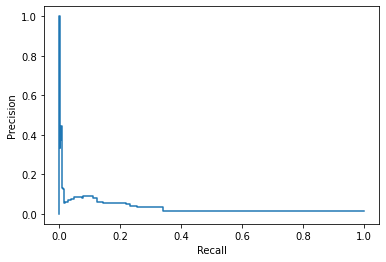

In [76]:
import numpy as np
# precision = np.append(precision, [1])
print(precision)
print(recall)
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

396.85183548927307


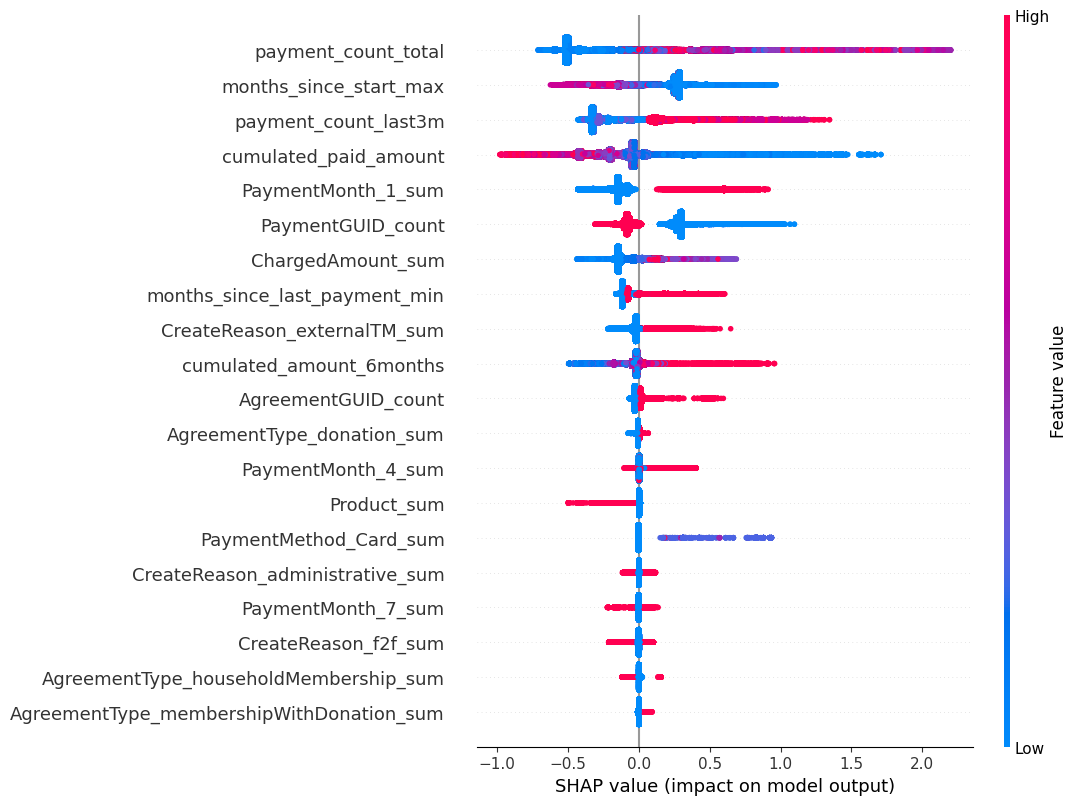

In [32]:
start_time = time.time()

model.model = xgbmodel
model.shap(X_test)

print(time.time() - start_time)

In [33]:
from sail.tmp import shap_private, get_tmp_fns

tmp_fns = get_tmp_fns()

In [34]:
tmp_fns

{'shap_private': '3B3C53AFB1DF415D811E69B32BAB6842',
 'smote': 'A9EB0703F1464698B1A173C5A6911127'}

In [35]:
for vm in vmids:
        for key in tmp_fns:
            pushsafeobj(vm, tmp_fns[key])

In [39]:
explanation_values, explanation_base_values, expected_value = shap_private(vmids[0], xgbmodel, X_test[0], tmp_fns)

['{8E0F42E7-E0EE-46CA-88C2-424A93C0D50D}']


In [40]:
y_test_df = RemoteDataFrame(vmids[0], y_test[0], fns)
lab = y_test_df.value_counts()
lab

0    503005
1      8359
Name: is_churned_within3m, dtype: int64

In [41]:
temp_index = y_test_df.index

In [42]:
import pandas as pd

customer_guid = []
date = []
for i in range(0, len(temp_index)):
    customer_guid.append(temp_index[i][0])
    date.append(temp_index[i][1])

# Add references to customer instances
df1 = pd.DataFrame()
df1['CustomerGUID'] = customer_guid
df1['Date'] = date

#add predictions
preds = model.predict(X_test)
df1['Predictions'] = preds[0]
df1['SHAP Base Values'] = explanation_base_values

#Add Explanation Values
df2 = pd.DataFrame()
df2 = pd.DataFrame(explanation_values)
df2.columns = cols
results_for_csv = pd.concat([df1, df2], axis=1, join='inner')
results_for_csv.to_csv('./results.csv')
results_for_csv.head()

,CustomerGUID,Date,Predictions,SHAP Base Values,Age_max,ChargedAmount_sum,PostalCode_max,PaidAmount_sum,AgreementGUID_count,PaymentGUID_count,...,PaymentMonth_9_sum,PaymentMonth_10_sum,PaymentMonth_11_sum,PaymentMonth_12_sum,cumulated_paid_amount,cumulated_amount_3months,cumulated_amount_6months,payment_count_last3m,payment_count_last6m,payment_count_total
0,000226bd-8955-4e94-becd-47ff50c1704c,2020-10-01,-4.539145,-4.105196,0.0,-0.288949,0.0,0.0,-0.052681,-0.072936,...,0.0,0.0,0.0,0.0,-0.365646,0.0,-0.082281,-0.076047,0.0,-0.364111
1,000226bd-8955-4e94-becd-47ff50c1704c,2020-11-01,-5.658274,-4.105196,0.0,-0.128897,0.0,0.0,-0.016414,0.256859,...,0.0,0.0,0.0,0.0,-0.581437,0.0,-0.079465,-0.293429,0.0,-0.645886
2,000226bd-8955-4e94-becd-47ff50c1704c,2020-12-01,-5.664840,-4.105196,0.0,-0.126656,0.0,0.0,-0.016392,0.253763,...,0.0,0.0,0.0,0.0,-0.644177,0.0,-0.078490,-0.267789,0.0,-0.636241
3,000226bd-8955-4e94-becd-47ff50c1704c,2021-01-01,-4.927501,-4.105196,0.0,-0.141441,0.0,0.0,-0.013804,0.245958,...,0.0,0.0,0.0,0.0,-0.632520,0.0,-0.079668,-0.184898,0.0,-0.634523
4,000226bd-8955-4e94-becd-47ff50c1704c,2021-02-01,-5.658274,-4.105196,0.0,-0.128897,0.0,0.0,-0.016414,0.256859,...,0.0,0.0,0.0,0.0,-0.581437,0.0,-0.079465,-0.293429,0.0,-0.645886


In [43]:
expected_value

-4.105196

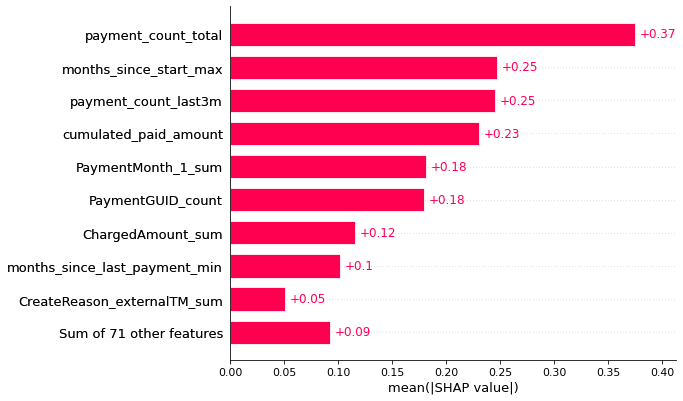

None


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


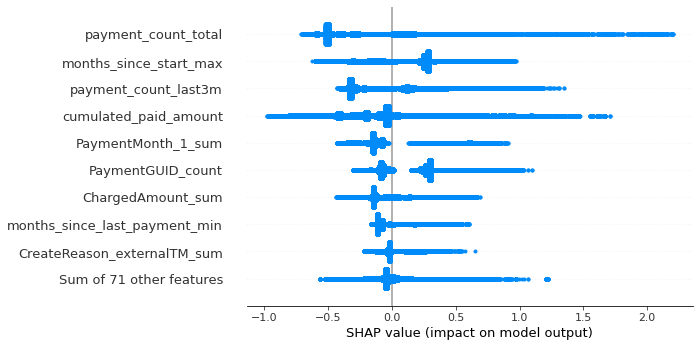

None


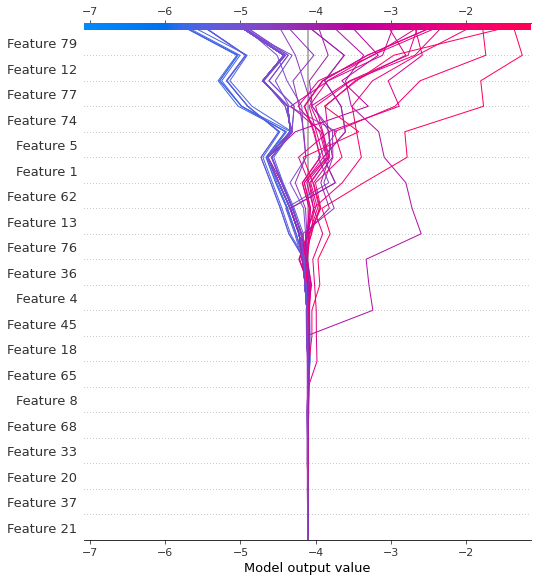

None


In [44]:
import shap

explanation = shap.Explanation(explanation_values, base_values=explanation_base_values, feature_names=cols)
print(shap.plots.bar(explanation))
print(shap.plots.beeswarm(explanation))
print(shap.decision_plot(expected_value, explanation.values[:50]))
# print(shap.plots._waterfall.waterfall_legacy(expected_value, explanation[0].values))